In [59]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [62]:
import matplotlib.pyplot as plt

In [63]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))

In [64]:
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

In [138]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-smpl3/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds3/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

basis = 'smpl'

csv_out_file = f'/Users/Josh/Downloads/hypswp/combined-mse/cleaned-hypswp-{basis}.csv'
file_locs = [
    f'/Users/Josh/Downloads/hypswp/Figure_1_2-mse_sctr-{basis}.csv',
    f'/Users/Josh/Downloads/hypswp/Figure_1_2-mse_sctr-{basis}-l2.csv',
#     r'/Users/Josh/Downloads/hypswp/Figure_1_2-mse_sctr-wds.csv',
#     r'/Users/Josh/Downloads/hypswp/Figure_1_2-mse_sctr-wds-l2.csv',
]

df_lst = []

for file_loc in file_locs:
    concat = pd.read_csv(file_loc)
    concat['model_version_r'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
    concat['model_version_r'] = concat['model_version_r'].str.replace('____',  '.')
    concat['model_version_r'] = concat['model_version_r'].str.replace('alpha','α=')
    concat['model_version_r'] = concat['model_version_r'].str.replace('l1_ratio','l1r=')
    # concat['model_version_r'] = concat['model_version_r'].apply(lambda x: ' / '.join(['='.join([_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))]) for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version_r'] = concat['model_version_r'].str.replace('base_','')
    concat['model_version_r'] = concat['model_version_r'].str.replace('simple_','')
    concat['model_version_r'] = concat['model_version_r'].str.replace('words_','')
    concat['model_version_r'] = concat['model_version_r'].apply(lambda x: ([{_.split('=')[0]: "{:010.5f}".format(float(_.split('=')[1]))} for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version_r'] = concat['model_version_r'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)
    
    concat['a'] = concat['model_version_r'].apply(lambda x: x['α'])
    concat['asn'] = concat['model_version_r'].apply(lambda x: '1e' + str(int(np.log10(float(x['α'])))) if float(x['l1r']) == 0 and float(x['α']) > 0 else float(x['α']))
    concat['l1r'] = concat['model_version_r'].apply(lambda x: float(x['l1r']))
    concat['l2r'] = 1 - concat['l1r']
    
    concat['model_version2'] = concat.apply(lambda x: {'α': x['asn'], 'l1r': x['l1r']}, axis=1)
    
    concat['label'] = concat['model_version2'].apply(lambda x: get_label(x))
    
#     concat = concat.drop('model_version', axis=1)
#     concat = concat.drop('model_version2', axis=1)
#     concat = concat.drop('asn', axis=1)
# #     concat = concat.drop('l1r', axis=1)
    
#     drop_values = ['L2, α=1e-3', 'L2, α=1e-2', 'L2, α=1e-1', 'L2, α=1e0', 'L2, α=1e1', 'L2, α=1e2', 'L2, α=1e3']
#     vbp = vbp[~vbp['mvl'].isin(drop_values)]
    
    
    drop_values = [(0, 1e-3), (0, 1e-2), (0, 1e1), (0, 1e2), (0, 1e3), (0, 1e4), (0, 1e6),
                   (1, 1e-3), (1, 1e1), (1, 1e2), (1, 1e3), (1, 1e4), (1, 1e5), (1, 1e6),
                  ]
    for entry in drop_values:
        concat = concat[(concat['l1r'].astype(float) != entry[0])|(concat['a'].astype(float) != entry[1])]
    
    
#     concat = concat.drop('model_version', axis=1)
    concat = concat.drop('model_version_r', axis=1)
    concat = concat.drop('model_version2', axis=1)
    concat = concat.drop('asn', axis=1)
    
    
    
    
    df_lst.append(concat)

concat = pd.concat(df_lst, axis=0)
concat.drop(['a', 'l1r', 'l2r', 'label'], axis=1).to_csv(csv_out_file)


In [139]:
# concat

In [140]:
# concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
concat = concat.set_index(['channel', 'name', 'label', 'run_num', 'a' ,'l1r', 'l2r']).drop('mouse_id', axis=1)

In [141]:
# vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)

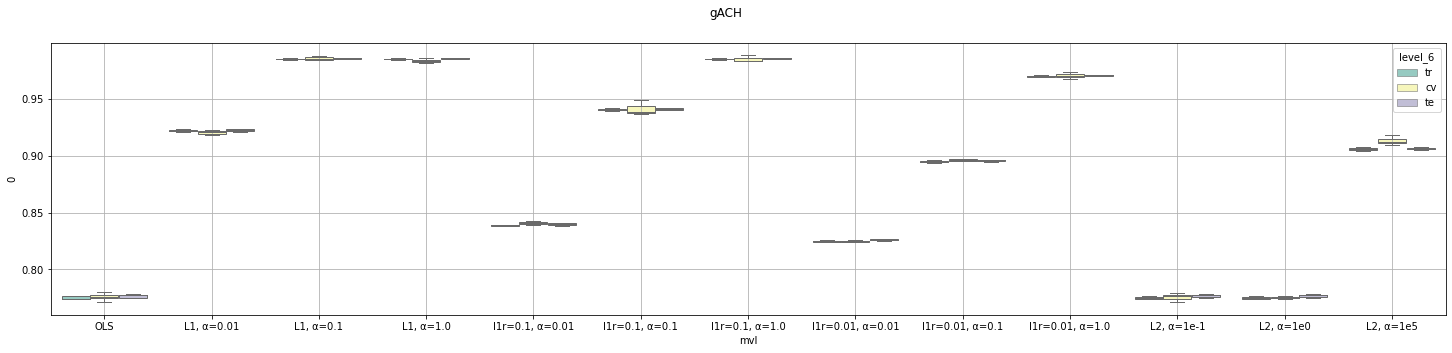

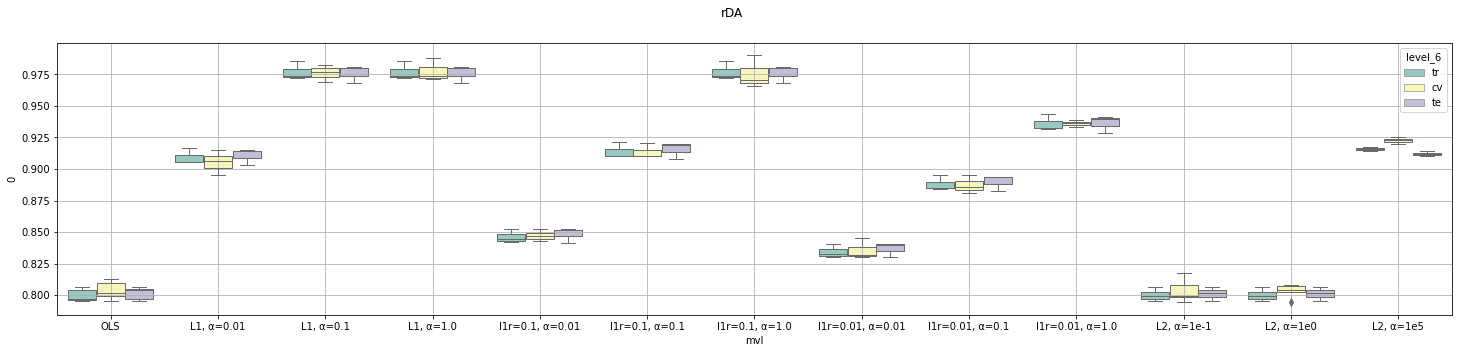

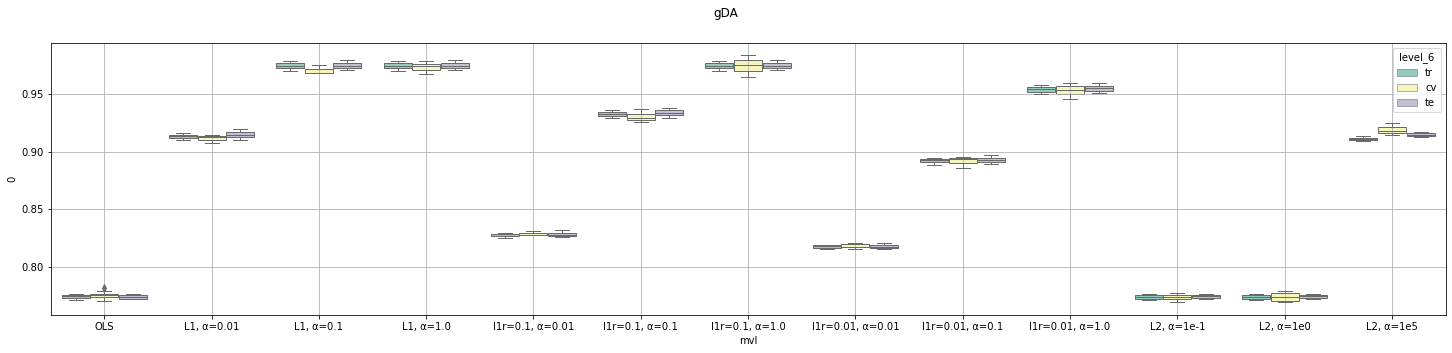

In [142]:
import seaborn as sns
for chl in concat.reset_index()['channel'].unique():
    
    fig, ax = plt.subplots(1,1,figsize=(25,5))
    
    fig.suptitle(chl)
    fig.set_facecolor('w')
    
    vwyc = concat.loc[chl].drop('model_version', axis=1).values
    ymn, ymx = np.min(vwyc), np.max(vwyc)
    
    vbp = concat.loc[chl].drop('model_version', axis=1).rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['label']
#     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
#     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
    vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
    vbp = vbp.sort_values(['l2r', 'a', 'level_6'])
    
    vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
    vbp['level_6'] = vbp['level_6'].apply(lambda x: x.split('_')[-1])
    
    sns.boxplot(data=vbp, x='mvl', y=0, hue='level_6', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=0)

In [78]:
vbp.dtypes

name        object
label       object
run_num     object
a           object
l1r        float64
l2r        float64
level_6     object
0          float64
mvl         object
dtype: object

In [79]:
vbp

,name,label,run_num,a,l1r,l2r,level_6,0,mvl
54,base_simple,1_OLS,num=0,0000.00000,1.0,0.0,tr,0.775099,OLS
57,base_simple,1_OLS,num=1,0000.00000,1.0,0.0,tr,0.772171,OLS
60,base_simple,1_OLS,num=2,0000.00000,1.0,0.0,tr,0.773910,OLS
55,base_simple,1_OLS,num=0,0000.00000,1.0,0.0,cv,0.772794,OLS
58,base_simple,1_OLS,num=1,0000.00000,1.0,0.0,cv,0.773966,OLS
...,...,...,...,...,...,...,...,...,...
130,base_simple,"3_L2, α=1e6",num=1,1000000.00000,0.0,1.0,cv,0.956929,"L2, α=1e6"
133,base_simple,"3_L2, α=1e6",num=2,1000000.00000,0.0,1.0,cv,0.960450,"L2, α=1e6"
128,base_simple,"3_L2, α=1e6",num=0,1000000.00000,0.0,1.0,te,0.960665,"L2, α=1e6"
131,base_simple,"3_L2, α=1e6",num=1,1000000.00000,0.0,1.0,te,0.957978,"L2, α=1e6"


In [15]:
pd.read_csv(file_loc)

,mouse_id,channel,name,model_version,run_num,mse_tr,mse_cv,mse_te
0,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.773617,0.774583,0.777865
1,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.774857,0.775838,0.776584
2,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=2,0.776475,0.778418,0.774944
3,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.773617,0.774112,0.777865
4,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.774857,0.776781,0.776584
...,...,...,...,...,...,...,...,...
94,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.771533,0.768501,0.775487
95,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=2,0.775697,0.776299,0.771455
96,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.771129,0.771729,0.775965
97,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.771510,0.769802,0.775492
